<a href="https://colab.research.google.com/github/isoomni/bitcoin_twitter/blob/master/tweets_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 전처리 for 워드클라우드

In [ ]:
pip install KoNLPy

In [ ]:
pip install pyperclip

In [ ]:
import numpy as np
import pandas as pd

from konlpy.tag import Okt
from wordcloud import WordCloud,STOPWORDS
from wordcloud import ImageColorGenerator


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/tweet_bitcoin/clean_tweets_df.csv')
df.head()

,Unnamed: 0,timestamp,review
0,0,2019-05-27 11:49:18+00,cardano digitize currencies eos https co ktkqk...
1,1,2019-05-27 11:49:06+00,another test tweet caught stream bitcoin
2,2,2019-05-27 11:49:22+00,current crypto prices btc usd eth usd ltc usd ...
3,3,2019-05-27 11:49:23+00,spiv nosar baz bitcoin asset amp currency http...
4,4,2019-05-27 11:49:25+00,nwoodfine building real bitcoin sv building br...


In [ ]:
# timestamp에 'en', null 값 제거
indexes = df[df['timestamp']=='en'].index
df = df.drop(index=indexes, axis=0)
df = df.dropna(how='any', axis=0)
df['timestamp'].unique()

array(['2019-05-27 11:49:18+00', '2019-05-27 11:49:06+00',
       '2019-05-27 11:49:22+00', ..., '2019-11-23 15:45:56+00',
       '2019-11-23 15:45:57+00', '2019-11-23 15:45:06+00'], dtype=object)

In [ ]:
# 시간 순서로 정렬
df.sort_values(by='timestamp')

,Unnamed: 0,timestamp,review
10143492,10143492,2007-04-19 07:14:38+00,happily mugging btc hook future rich lawyer bf...
14,14,2009-01-11 03:33:52+00,running bitcoin
4580370,4580370,2009-01-21 17:29:40+00,looking ways add anonymity bitcoin
4616565,4616565,2009-01-27 20:14:10+00,thinking reduce co emissions widespread bitcoi...
4663012,4663012,2009-01-29 13:37:53+00,satoshi nakamoto bitcoin v available
...,...,...,...
14583111,14583111,2019-11-23 15:45:53+00,worlds first millennium firm https co lqgie ak...
14583113,14583113,2019-11-23 15:45:55+00,daily profit hodling btc since data taken sinc...
14583115,14583115,2019-11-23 15:45:55+00,bitcoin suisse certificates https co ndabknotk
14583116,14583116,2019-11-23 15:45:56+00,register early access codugh api marketplace p...


In [ ]:
# 연월일로 열 생성
df['date'] = pd.to_datetime(df['timestamp'],format= '%Y-%m-%d').dt.date
df['date']

0           2019-05-27
1           2019-05-27
2           2019-05-27
3           2019-05-27
4           2019-05-27
               ...    
14583114    2019-11-23
14583115    2019-11-23
14583116    2019-11-23
14583117    2019-11-23
14583118    2019-11-23
Name: date, Length: 14575394, dtype: object

In [ ]:
df = df.reset_index(drop=True)
df = df[['date','review']]
df = df.sort_values(by='date')
df

,date,review
0,2007-04-19,happily mugging btc hook future rich lawyer bf...
1,2009-01-11,running bitcoin
2,2009-01-21,looking ways add anonymity bitcoin
3,2009-01-27,thinking reduce co emissions widespread bitcoi...
4,2009-01-29,satoshi nakamoto bitcoin v available
...,...,...
14557260,2019-11-23,market cap btc dominance btc eth btc xrp btc u...
14557259,2019-11-23,esax ieo technology
14557258,2019-11-23,register early access codugh api marketplace p...
14557256,2019-11-23,new bitcoin report block transactions usd tota...


In [ ]:
dataframe =df

In [ ]:
dataframe['date'] = dataframe['date'].astype(str)
dataframe['review'] = dataframe['review'].astype(str)

In [ ]:
df_done = dataframe[dataframe['date'].str.contains('2014-09|2014-10|2014-11|2014-12|2015|2016|2017|2018|2019')]

In [ ]:
df_done.to_csv('tweets_for_wordcloud.csv')

### 워드 클라우드

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/tweet_bitcoin/tweets_for_wordcloud.csv')
df.head()

,Unnamed: 0,date,review
0,286895,2014-09-01,utc h range volume btc
1,286893,2014-09-01,last mins arb opps spanning exchange pair yiel...
2,286894,2014-09-01,live profit buy b bitfinex sell vircurex bitco...
3,286891,2014-09-01,last mins arb opps spanning exchange pair yiel...
4,286892,2014-09-01,last mins arb opps spanning exchange pair yiel...


In [ ]:
df = df[['date','review']]
df

,date,review
0,2014-09-01,utc h range volume btc
1,2014-09-01,last mins arb opps spanning exchange pair yiel...
2,2014-09-01,live profit buy b bitfinex sell vircurex bitco...
3,2014-09-01,last mins arb opps spanning exchange pair yiel...
4,2014-09-01,last mins arb opps spanning exchange pair yiel...
...,...,...
14288933,2019-11-23,market cap btc dominance btc eth btc xrp btc u...
14288934,2019-11-23,esax ieo technology
14288935,2019-11-23,register early access codugh api marketplace p...
14288936,2019-11-23,new bitcoin report block transactions usd tota...


#### 2015-06 ~ 08 
2015년 8월 52주 신저가 갱신

In [ ]:
import nltk
import pickle
from nltk.corpus import stopwords
import re
nltk.download('all')

In [ ]:
df_2019_de = df[df['date'].str.contains('2019-04')]

In [ ]:
df_de = df[df['date'].str.contains('2017-06-14')]

In [ ]:
# 불필요한 심볼을 없애고 문장 단위로 끊었다.
df_de = re.sub(r'[^\.\?\!\w\d\s]','',str(df_de['review'])) # 문장단위로 끊기
print(df_de)

594600         bitcoin ultima r alta r baixa r fonte foxbit
594601            btc bitcoin quotes bitstamp btce coinbase
594602            btc bitcoin quotes bitstamp btce coinbase
594603    btc hr summary last high low change volume btc...
594604    would auspicious buy https bittylicious com re...
                                ...                        
598857    current value doge btc vircurex volume today t...
598858    bitcoin needs regulation boom morgan stanley h...
598859    xekylnvm ttg vmak btc free lottery get free bi...
598860    gonna risk drop alts bitcoin goes shit one day...
598861    believe already atm bitcoin awesome check http...
Name review Length 4262 dtype object


In [ ]:
# 모두 소문자로 변환한다.
df_de = df_de.lower()

In [ ]:
# 각각의 워드를 토큰으로 쪼갠다.
word_tokens = nltk.word_tokenize(df_de)
print(word_tokens)

['594600', 'bitcoin', 'ultima', 'r', 'alta', 'r', 'baixa', 'r', 'fonte', 'foxbit', '594601', 'btc', 'bitcoin', 'quotes', 'bitstamp', 'btce', 'coinbase', '594602', 'btc', 'bitcoin', 'quotes', 'bitstamp', 'btce', 'coinbase', '594603', 'btc', 'hr', 'summary', 'last', 'high', 'low', 'change', 'volume', 'btc', '...', '594604', 'would', 'auspicious', 'buy', 'https', 'bittylicious', 'com', 're', '...', '...', '598857', 'current', 'value', 'doge', 'btc', 'vircurex', 'volume', 'today', 't', '...', '598858', 'bitcoin', 'needs', 'regulation', 'boom', 'morgan', 'stanley', 'h', '...', '598859', 'xekylnvm', 'ttg', 'vmak', 'btc', 'free', 'lottery', 'get', 'free', 'bi', '...', '598860', 'gon', 'na', 'risk', 'drop', 'alts', 'bitcoin', 'goes', 'shit', 'one', 'day', '...', '598861', 'believe', 'already', 'atm', 'bitcoin', 'awesome', 'check', 'http', '...', 'name', 'review', 'length', '4262', 'dtype', 'object']


In [ ]:
# 품사를 분리한다.
# 영어의 경우는 nltk에서 제공하는 pos_tag() 함수를 사용해서 품사 태깅을 할 수 있다
# pos_tag()의 입력값으로는 단어의 리스트가 들어가야 한다.
tokens_pos = nltk.pos_tag(word_tokens)
print(tokens_pos)

[('594600', 'CD'), ('bitcoin', 'NN'), ('ultima', 'JJ'), ('r', 'NN'), ('alta', 'NN'), ('r', 'NN'), ('baixa', 'NN'), ('r', 'NN'), ('fonte', 'JJ'), ('foxbit', 'NN'), ('594601', 'CD'), ('btc', 'NN'), ('bitcoin', 'NN'), ('quotes', 'VBZ'), ('bitstamp', 'JJ'), ('btce', 'NN'), ('coinbase', 'NN'), ('594602', 'CD'), ('btc', 'NN'), ('bitcoin', 'NN'), ('quotes', 'VBZ'), ('bitstamp', 'JJ'), ('btce', 'NN'), ('coinbase', 'NN'), ('594603', 'CD'), ('btc', 'NN'), ('hr', 'NN'), ('summary', 'NN'), ('last', 'JJ'), ('high', 'JJ'), ('low', 'JJ'), ('change', 'NN'), ('volume', 'NN'), ('btc', 'NN'), ('...', ':'), ('594604', 'CD'), ('would', 'MD'), ('auspicious', 'JJ'), ('buy', 'VB'), ('https', 'JJ'), ('bittylicious', 'JJ'), ('com', 'NN'), ('re', 'NN'), ('...', ':'), ('...', ':'), ('598857', 'CD'), ('current', 'JJ'), ('value', 'NN'), ('doge', 'NN'), ('btc', 'IN'), ('vircurex', 'NN'), ('volume', 'NN'), ('today', 'NN'), ('t', 'VBP'), ('...', ':'), ('598858', 'CD'), ('bitcoin', 'NN'), ('needs', 'NNS'), ('regulation

In [ ]:
# 명사만 추출하기
# 명사는 NN을 포함하고 있음을 알 수 있음
NN_words = []
for word, pos in tokens_pos:
    if 'NN' or 'JJ' in pos:
        NN_words.append(word)
print(NN_words)

['594600', 'bitcoin', 'ultima', 'r', 'alta', 'r', 'baixa', 'r', 'fonte', 'foxbit', '594601', 'btc', 'bitcoin', 'quotes', 'bitstamp', 'btce', 'coinbase', '594602', 'btc', 'bitcoin', 'quotes', 'bitstamp', 'btce', 'coinbase', '594603', 'btc', 'hr', 'summary', 'last', 'high', 'low', 'change', 'volume', 'btc', '...', '594604', 'would', 'auspicious', 'buy', 'https', 'bittylicious', 'com', 're', '...', '...', '598857', 'current', 'value', 'doge', 'btc', 'vircurex', 'volume', 'today', 't', '...', '598858', 'bitcoin', 'needs', 'regulation', 'boom', 'morgan', 'stanley', 'h', '...', '598859', 'xekylnvm', 'ttg', 'vmak', 'btc', 'free', 'lottery', 'get', 'free', 'bi', '...', '598860', 'gon', 'na', 'risk', 'drop', 'alts', 'bitcoin', 'goes', 'shit', 'one', 'day', '...', '598861', 'believe', 'already', 'atm', 'bitcoin', 'awesome', 'check', 'http', '...', 'name', 'review', 'length', '4262', 'dtype', 'object']


In [ ]:
# Lemmatization(원형(lemma) 찾기)
# 영어는 각 word의 원형을 찾는 기능을 활용할 수 있다. 원형을 찾아 같은 의미의 단어 토큰들을 하나의 값으로 인지하도록 한다. 자세한 내용은 아래 링크에서 확인할 수 있다.
# https://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization
# nltk에서 제공되는 WordNetLemmatizer을 이용
# ex) 명사의 경우는 보통 복수 -> 단수 형태로 변형
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in NN_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

print(lemmatized_words)

['594600', 'bitcoin', 'ultima', 'r', 'alta', 'r', 'baixa', 'r', 'fonte', 'foxbit', '594601', 'btc', 'bitcoin', 'quote', 'bitstamp', 'btce', 'coinbase', '594602', 'btc', 'bitcoin', 'quote', 'bitstamp', 'btce', 'coinbase', '594603', 'btc', 'hr', 'summary', 'last', 'high', 'low', 'change', 'volume', 'btc', '...', '594604', 'would', 'auspicious', 'buy', 'http', 'bittylicious', 'com', 're', '...', '...', '598857', 'current', 'value', 'doge', 'btc', 'vircurex', 'volume', 'today', 't', '...', '598858', 'bitcoin', 'need', 'regulation', 'boom', 'morgan', 'stanley', 'h', '...', '598859', 'xekylnvm', 'ttg', 'vmak', 'btc', 'free', 'lottery', 'get', 'free', 'bi', '...', '598860', 'gon', 'na', 'risk', 'drop', 'alt', 'bitcoin', 'go', 'shit', 'one', 'day', '...', '598861', 'believe', 'already', 'atm', 'bitcoin', 'awesome', 'check', 'http', '...', 'name', 'review', 'length', '4262', 'dtype', 'object']


In [ ]:
# nltk에서 제공하는 불용어 사전을 통해 사용하지 않을 단어를 제거할 수 있다. 불용어 기본 사전을 통해 1차 제거용으로 활용한다.
stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

# 불용어 제거
for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)



In [ ]:
# 3글자 이상만 추출
final_NN_words = [e for e in final_NN_words if len(e) >= 3]

In [ ]:
customized_stopwords = ['btc', 'min', "inr", "http", "dtype", "object", "bitcoin", "bit", "btce", "btcusd", "range", "average", "sell",
                        'volume', 'change', 'price', 'review', 'size', 'byte', 'gbtc','trend', 'cap', 'worth' ] # 직접 만든 불용어 사전

unique_NN_words1 = set(final_NN_words)
for word in unique_NN_words1:
    if word in customized_stopwords:
        while word in final_NN_words: final_NN_words.remove(word)

print(final_NN_words)

['594600', 'ultima', 'alta', 'baixa', 'fonte', 'foxbit', '594601', 'quote', 'bitstamp', 'coinbase', '594602', 'quote', 'bitstamp', 'coinbase', '594603', 'summary', 'last', 'high', 'low', '...', '594604', 'would', 'auspicious', 'buy', 'bittylicious', 'com', '...', '...', '598857', 'current', 'value', 'doge', 'vircurex', 'today', '...', '598858', 'need', 'regulation', 'boom', 'morgan', 'stanley', '...', '598859', 'xekylnvm', 'ttg', 'vmak', 'free', 'lottery', 'get', 'free', '...', '598860', 'gon', 'risk', 'drop', 'alt', 'shit', 'one', 'day', '...', '598861', 'believe', 'already', 'atm', 'awesome', 'check', '...', 'name', 'length', '4262']


In [ ]:
# 빈도 분석
from collections import Counter
c = Counter(final_NN_words) # input type should be a list of words (or tokens)
print(c)
k = 50
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

Counter({'...': 8, 'quote': 2, 'bitstamp': 2, 'coinbase': 2, 'free': 2, '594600': 1, 'ultima': 1, 'alta': 1, 'baixa': 1, 'fonte': 1, 'foxbit': 1, '594601': 1, '594602': 1, '594603': 1, 'summary': 1, 'last': 1, 'high': 1, 'low': 1, '594604': 1, 'would': 1, 'auspicious': 1, 'buy': 1, 'bittylicious': 1, 'com': 1, '598857': 1, 'current': 1, 'value': 1, 'doge': 1, 'vircurex': 1, 'today': 1, '598858': 1, 'need': 1, 'regulation': 1, 'boom': 1, 'morgan': 1, 'stanley': 1, '598859': 1, 'xekylnvm': 1, 'ttg': 1, 'vmak': 1, 'lottery': 1, 'get': 1, '598860': 1, 'gon': 1, 'risk': 1, 'drop': 1, 'alt': 1, 'shit': 1, 'one': 1, 'day': 1, '598861': 1, 'believe': 1, 'already': 1, 'atm': 1, 'awesome': 1, 'check': 1, 'name': 1, 'length': 1, '4262': 1})
[('...', 8), ('quote', 2), ('bitstamp', 2), ('coinbase', 2), ('free', 2), ('594600', 1), ('ultima', 1), ('alta', 1), ('baixa', 1), ('fonte', 1), ('foxbit', 1), ('594601', 1), ('594602', 1), ('594603', 1), ('summary', 1), ('last', 1), ('high', 1), ('low', 1), (

In [ ]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

noun_text = ''
for word in final_NN_words:
    noun_text = noun_text +' '+word
noun_text

' 594600 ultima alta baixa fonte foxbit 594601 quote bitstamp coinbase 594602 quote bitstamp coinbase 594603 summary last high low ... 594604 would auspicious buy bittylicious com ... ... 598857 current value doge vircurex today ... 598858 need regulation boom morgan stanley ... 598859 xekylnvm ttg vmak free lottery get free ... 598860 gon risk drop alt shit one day ... 598861 believe already atm awesome check ... name length 4262'

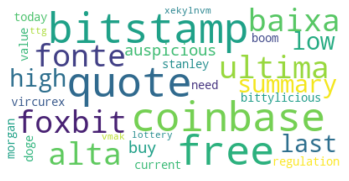

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=30, background_color='white', relative_scaling=.5).generate(noun_text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()